<a href="https://colab.research.google.com/github/nidhi-158/First-Project/blob/main/Mc_Donalds_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

Load the dataset

In [2]:
df=pd.read_csv("/content/mcdonalds.csv")

Columns of the dataset

In [3]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

Dataset shape

In [4]:
df.shape

(1453, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [7]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [8]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Convert categorical values to binary format (1/0 or Yes/No):

In [9]:
matrix = df.iloc[:, 0:11]
matrix = (matrix == 'Yes').astype(int)

Column Means

In [10]:
column_means = matrix.mean().round(2)
print(column_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


Perform PCA

In [11]:
pca = PCA()
matrix_pca = pca.fit_transform(matrix)
print(pd.DataFrame(matrix_pca).head())

         0         1         2         3         4         5         6   \
0  0.425367 -0.219079  0.663255 -0.401300  0.201705 -0.389767 -0.211982   
1 -0.218638  0.388190 -0.730827 -0.094724  0.044669 -0.086596 -0.095877   
2  0.375415  0.730435 -0.122040  0.692262  0.839643 -0.687406  0.583112   
3 -0.172926 -0.352752 -0.843795  0.206998 -0.681415 -0.036133 -0.054284   
4  0.187057 -0.807610  0.028537  0.548332  0.854074 -0.097305 -0.457043   

         7         8         9         10  
0  0.163235  0.181007  0.515706 -0.567074  
1 -0.034756  0.111476  0.493313 -0.500440  
2  0.364379 -0.322288  0.061759  0.242741  
3 -0.231477 -0.028003 -0.250678 -0.051034  
4  0.171758 -0.074409  0.031897  0.082245  


Plotting of PCA

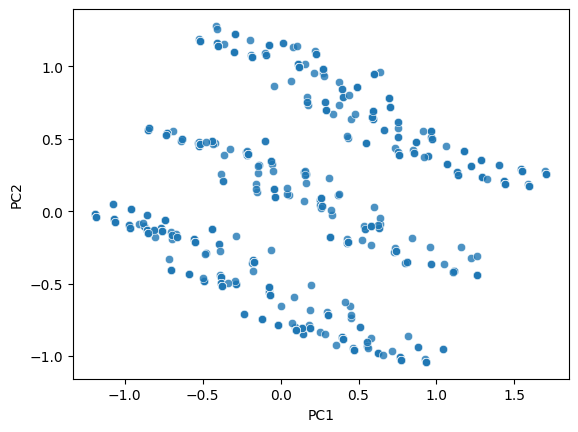

In [12]:
sns.scatterplot(x=matrix_pca[:,0],y=matrix_pca[:,1],alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

K-Means Clustering

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)
kmeans = [KMeans(n_clusters=i, n_init=10, random_state=1234).fit(matrix) for i in range(2, 9)]

# Adjusted Rand Index
# The range of j is now (i+1, 7) to stay within the bounds of the kmeans list.
scores = [adjusted_rand_score(kmeans[i].labels_, kmeans[j].labels_) for i in range(6) for j in range(i+1, 7)]
print(scores)

[0.5867578170199765, 0.3681225204228202, 0.32442460686405544, 0.2624642779536645, 0.2133278706440449, 0.21441551505390408, 0.5895352139290793, 0.5315325370155739, 0.4363277430207138, 0.37282167499241003, 0.3560529413545568, 0.5544831670259551, 0.4837555402669167, 0.4223744845381791, 0.3817014148230745, 0.8733026767488733, 0.7023626389743496, 0.7040033392581939, 0.727360570702741, 0.8159408127393183, 0.7120004187120109]


Plotting of K-Means

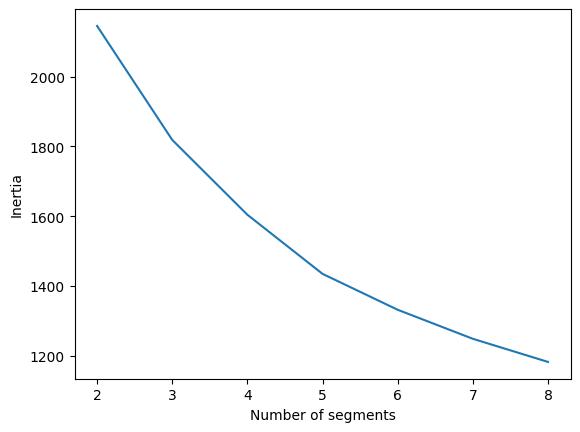

In [14]:
num_clusters = list(range(2, 9))
plt.plot(num_clusters, [k.inertia_ for k in kmeans])
plt.xlabel('Number of segments')
plt.ylabel('Inertia')
plt.show()

Reclustering and Stability of Segment

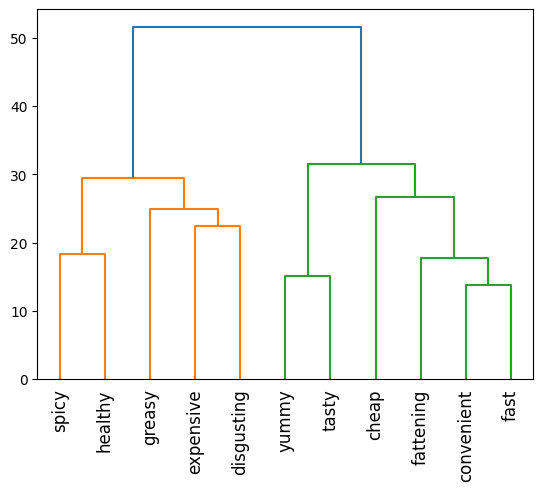

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linkage_matrix = linkage(matrix.T, 'ward')
dendrogram(linkage_matrix, labels=matrix.columns)
plt.xticks(rotation=90)
plt.show()

Hierarchical clustering for clustering segments

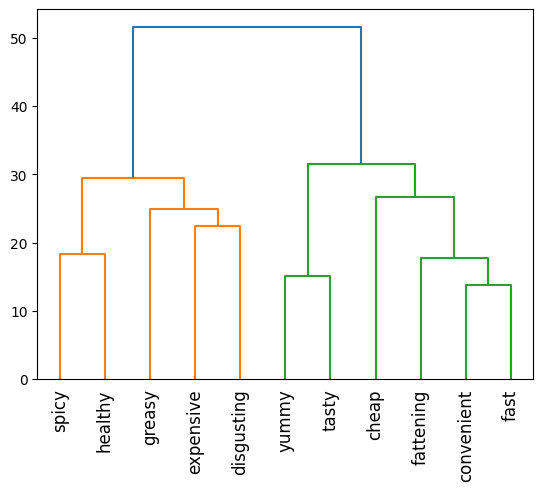

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

MD_vclust = linkage(matrix.T, 'ward')
dendrogram(MD_vclust, labels=matrix.columns, leaf_rotation=90)
plt.show()

K-Means Clustering on PCA

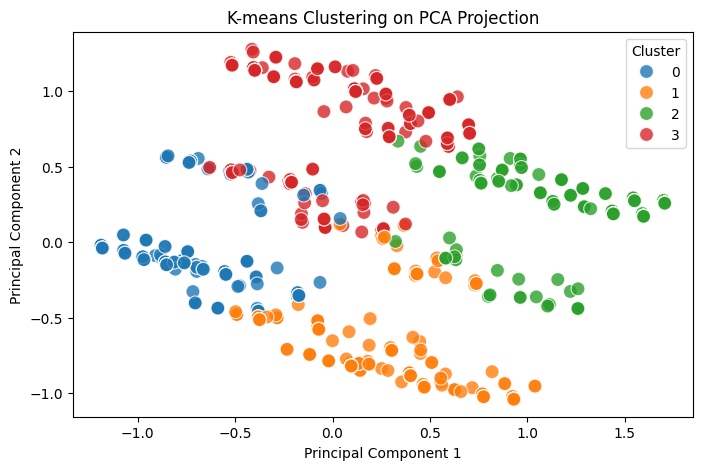

In [17]:
# Assuming k-means with 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(matrix)

# Projecting the data using PCA
pca_df = pd.DataFrame(matrix_pca, columns=[f'PC{i+1}' for i in range(matrix_pca.shape[1])])

# Adding the cluster labels from k-means
pca_df['Cluster'] = kmeans_4.labels_

# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', alpha=0.8, s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA Projection')
plt.legend(title='Cluster')
plt.show()


Mosaic Plot

<Figure size 1200x800 with 0 Axes>

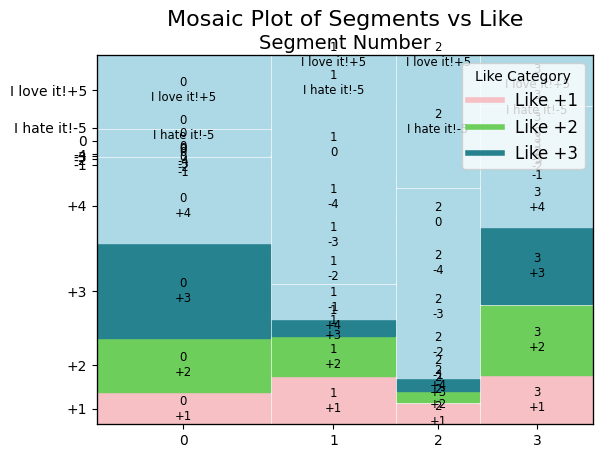

In [18]:
from statsmodels.graphics.mosaicplot import mosaic
# Create the mosaic plot
k4_labels = kmeans_4.labels_
like_column = df['Like']  # Assuming 'Like' is a column in the original dataframe

# Generate the contingency table
contingency_table = pd.crosstab(k4_labels, like_column)

# Define a color mapping (replace with your desired colors)
colors = {'+1': '#f6c0c5', '+2': '#6ece5b', '+3': '#26828e'}
# Define legend labels corresponding to the colors
legend_labels = {'#f6c0c5': 'Like +1', '#6ece5b': 'Like +2', '#26828e': 'Like +3'} # Add labels for all colors

# Plot the mosaic plot
plt.figure(figsize=(12, 8))
mosaic(contingency_table.stack(),
       properties=lambda key: {'color': colors.get(key[1], 'lightblue')},
       labelizer=lambda x: f'{x[0]}\n{x[1]}')  # Show labels in each segment
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
plt.legend(handles, [legend_labels[color] for color in colors.values()], title='Like Category', loc='upper right', fontsize=12)

plt.xlabel('Segment Number', fontsize=14)
plt.ylabel('Like', fontsize=14)
plt.title('Mosaic Plot of Segments vs Like', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Decision Tree

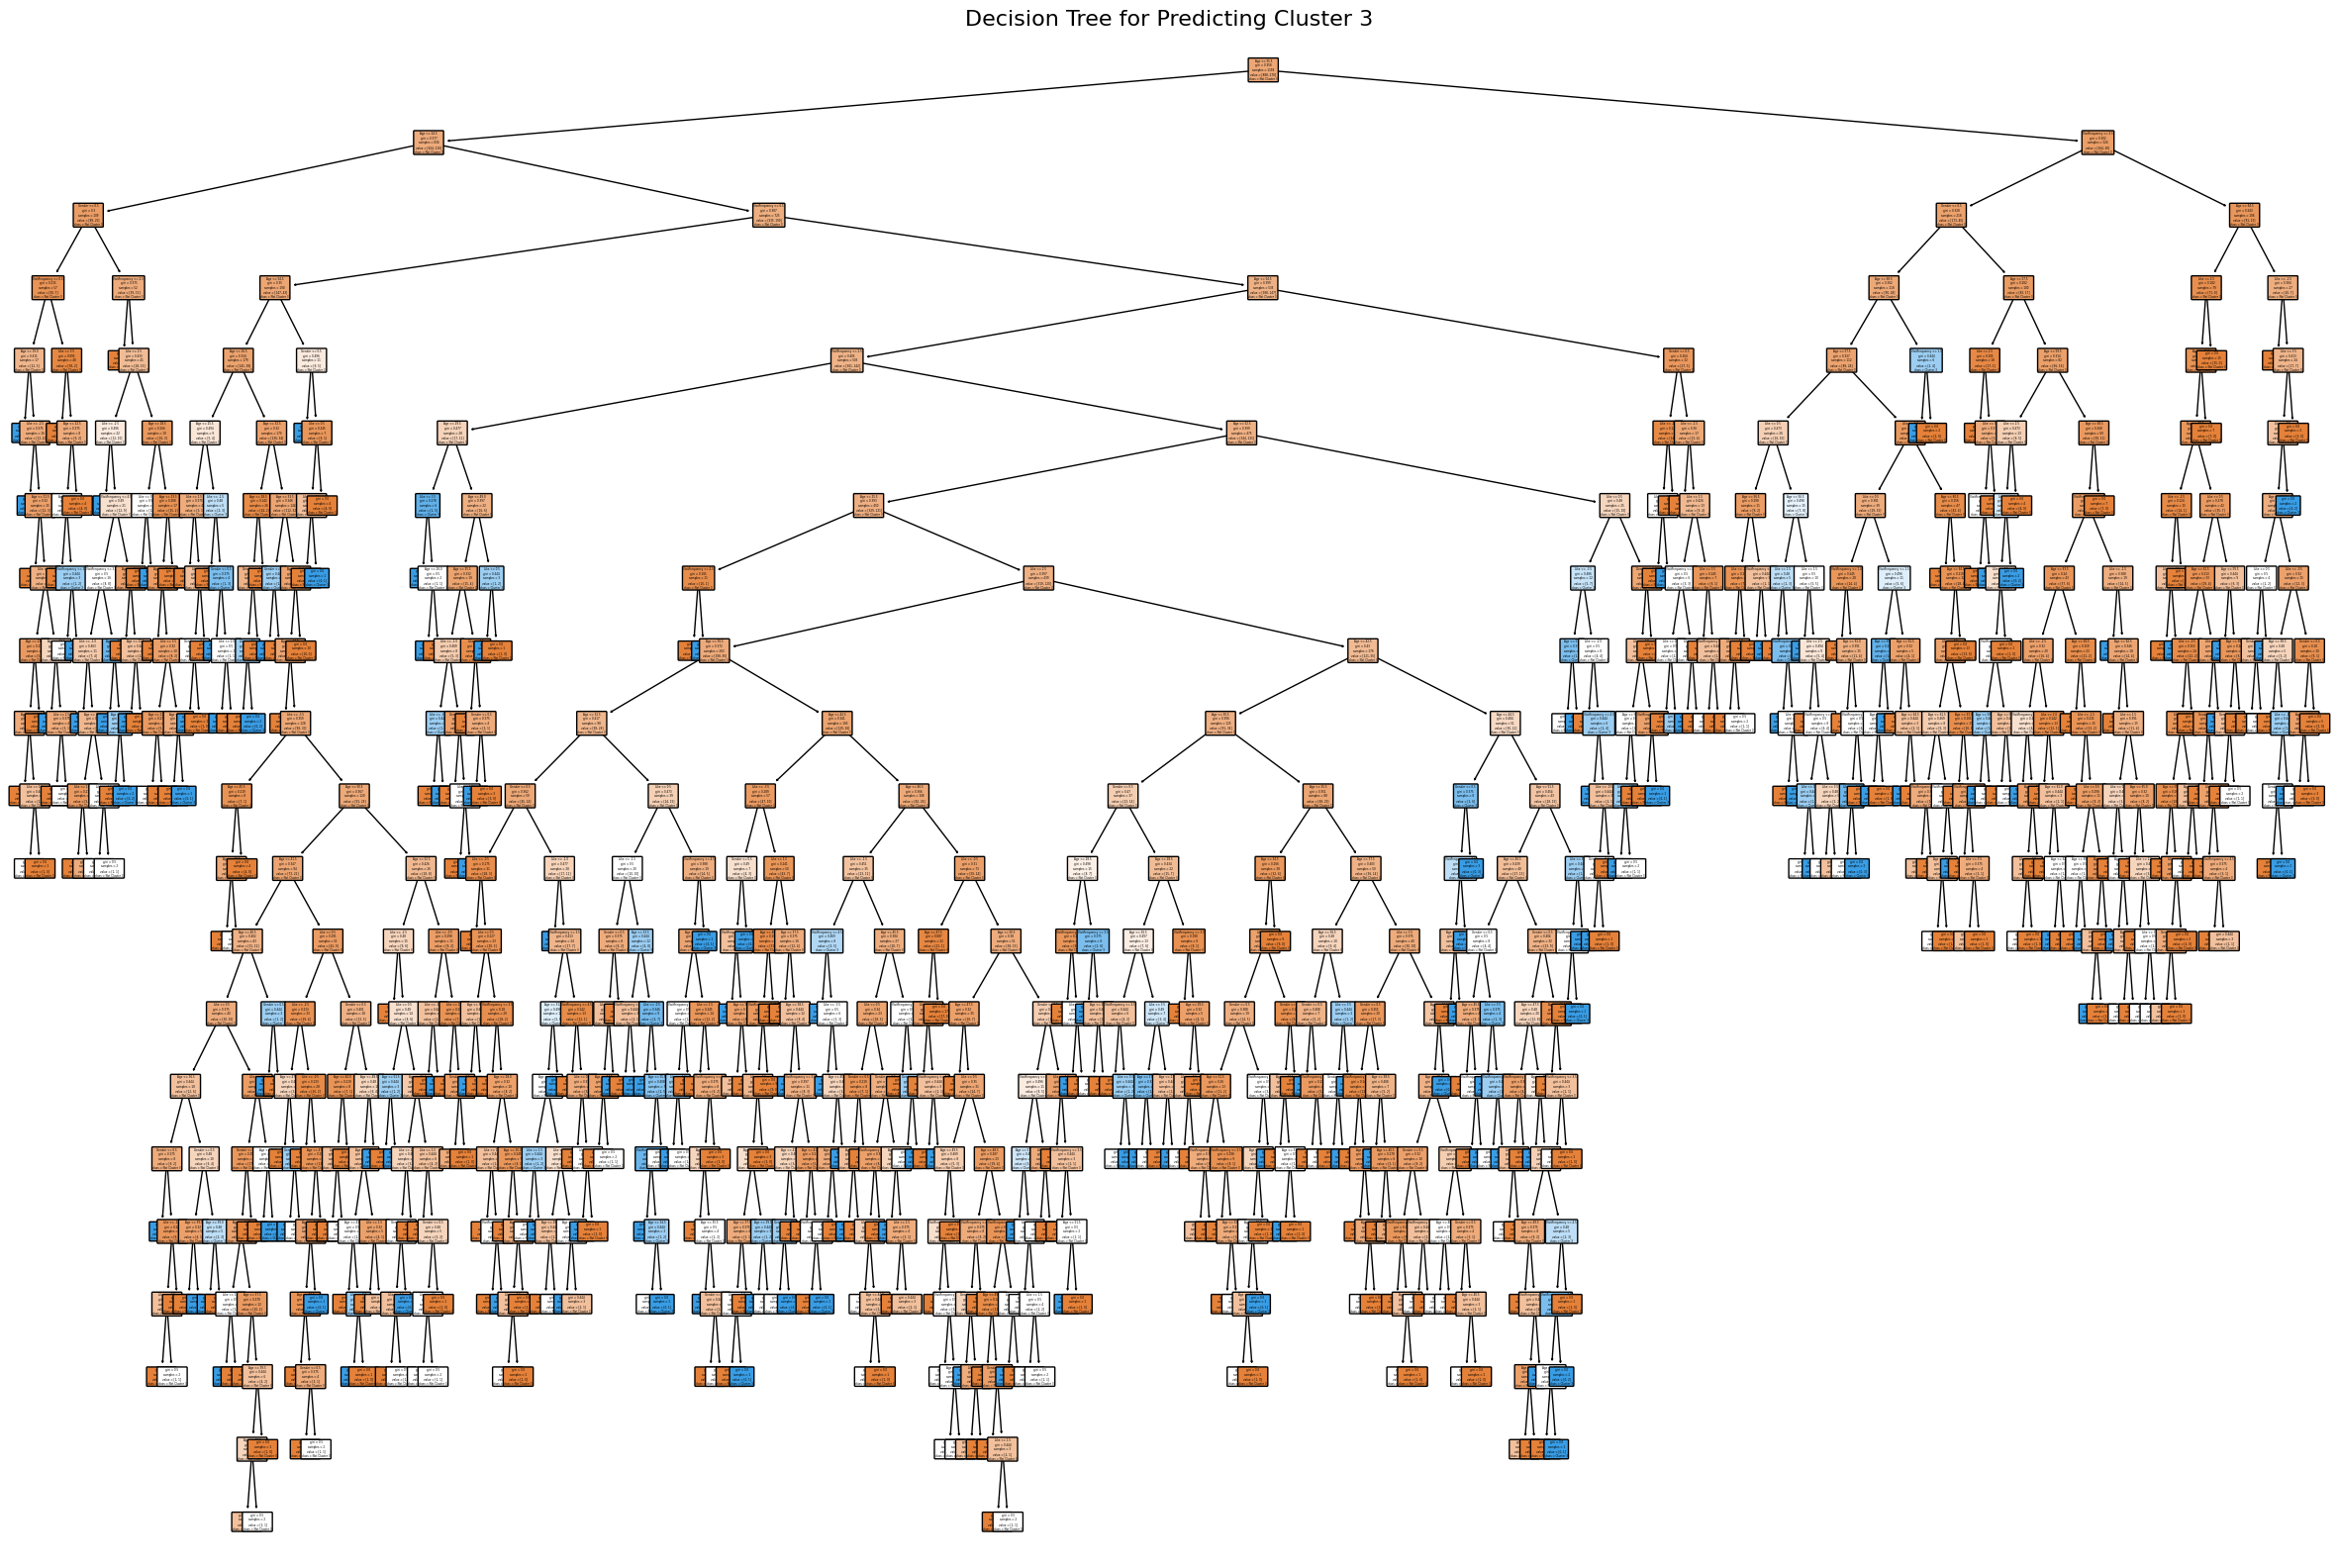

In [19]:
label_encoders = {}
for column in ['VisitFrequency', 'Gender']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Ensure 'Like' and 'Age' are numeric and drop rows with missing values
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Like', 'Age', 'VisitFrequency', 'Gender'])

# Align lengths of k4_labels and df
if len(df) > len(k4_labels):
    df = df.iloc[:len(k4_labels), :]
elif len(df) < len(k4_labels):
    k4_labels = k4_labels[:len(df)]

# Train and plot the decision tree
dtree = DecisionTreeClassifier(random_state=1234)
dtree.fit(df[['Like', 'Age', 'VisitFrequency', 'Gender']], (k4_labels == 3).astype(int))

plt.figure(figsize=(30, 20))  # Increase the figure size to fit all nodes
plot_tree(dtree,
          feature_names=['Like', 'Age', 'VisitFrequency', 'Gender'],
          class_names=['Not Cluster 3', 'Cluster 3'],
          filled=True,
          rounded=True,
          fontsize=2)  # Set the font size to the smallest possible
plt.title('Decision Tree for Predicting Cluster 3', fontsize=16)
plt.show()

<ipython-input-42-8ef0f705ccaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_clusters.index, y=sorted_clusters, palette='coolwarm')


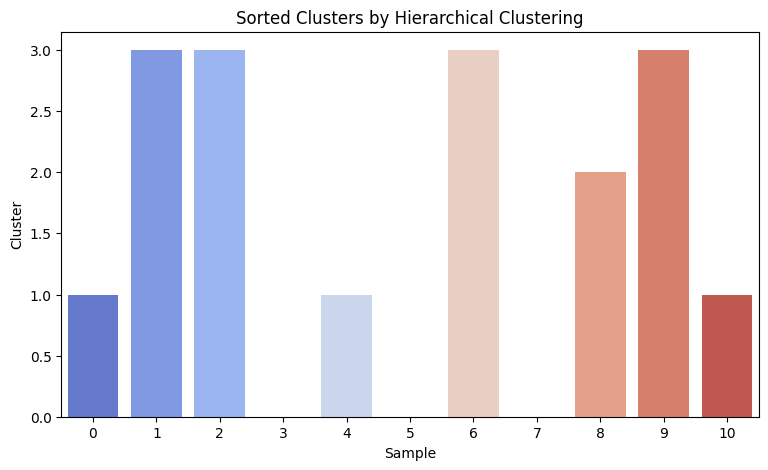

In [42]:
order = dendrogram(linkage(matrix.T, 'ward'), no_plot=True)['leaves']

# Sort and plot
sorted_clusters = pd.Series(kmeans[2].labels_).iloc[order]
plt.figure(figsize=(9, 5))
sns.barplot(x=sorted_clusters.index, y=sorted_clusters, palette='coolwarm')
plt.xlabel('Sample')
plt.ylabel('Cluster')
plt.title('Sorted Clusters by Hierarchical Clustering')
plt.show()

Statistical analysis:

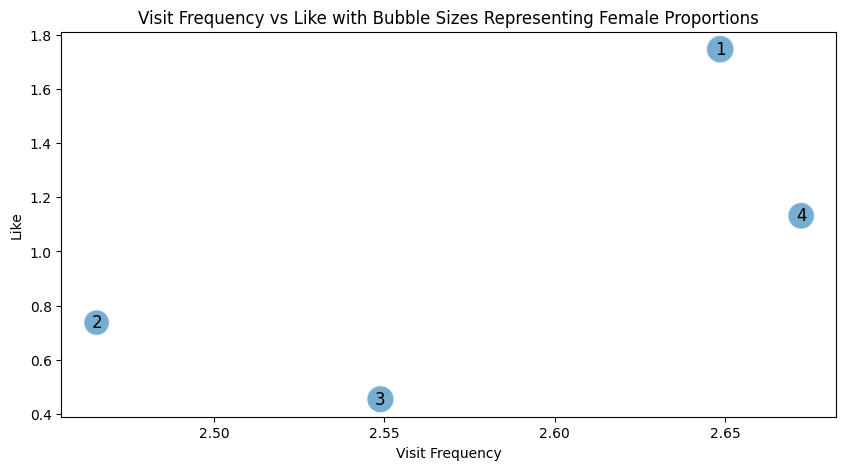

In [34]:
import matplotlib.pyplot as plt

# Compute means for 'VisitFrequency', 'Like', and 'Gender_Female'
visit = df.groupby('Cluster')['VisitFrequency'].mean()
like = df.groupby('Cluster')['Like'].mean()
female_means = df.groupby('Cluster')['Gender_Female'].mean()

# Bubble sizes proportional to 'female_means' (scaled up for visibility)
plt.figure(figsize=(10,5))
plt.scatter(visit, like, s=800 * female_means, alpha=0.6, edgecolors="w")

# Add text labels
for i in visit.index:
    plt.text(visit[i], like[i], str(i+1), fontsize=12, ha='center', va='center')

# Add labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Visit Frequency vs Like with Bubble Sizes Representing Female Proportions')
plt.show()